In [1]:
import pandas as pd

In [2]:
import os

In [3]:
file_path ="/home/moranciox/Practica/Excel_practicas/Resultados_Foliar_v2.xlsx"

In [4]:
if os.path.exists(file_path):
    print("File exists")
else:
    print("file not found")

File exists


In [5]:
# Reemplaza 'nombre_del_archivo.xlsx' con el nombre de tu archivo Excel
df = pd.read_excel('/home/moranciox/Practica/Excel_practicas/Resultados_Foliar_v2.xlsx', sheet_name="Resultados")


In [6]:
print(df.head())

     Ensayo Tratamiento Repetición        Compost Aplicación Concentración  \
0  Emiliana          T0         R1      No aplica  No aplica     No aplica   
1  Emiliana          T0         R2      No aplica  No aplica     No aplica   
2  Emiliana          T0         R3      No aplica  No aplica     No aplica   
3  Emiliana          T1         R1  Concha y Toro     Hilera       4 tn/ha   
4  Emiliana          T1         R2  Concha y Toro     Hilera       4 tn/ha   

             Variedad  Año de plantación Tejido analizado Fecha muestreo  ...  \
0  Cabernet Sauvignon             2010.0             Hoja     2023-01-31  ...   
1  Cabernet Sauvignon             2010.0             Hoja     2023-01-31  ...   
2  Cabernet Sauvignon             2010.0             Hoja     2023-01-31  ...   
3  Cabernet Sauvignon             2010.0             Hoja     2023-01-31  ...   
4  Cabernet Sauvignon             2010.0             Hoja     2023-01-31  ...   

   K (%)  Mg (%)  P (%)  S (%)  B (ppm)  Cu 

In [7]:
import pandas as pd
import scipy.stats as stats

# Filtra el DataFrame solo para el ensayo 'Emiliana'
df_emiliana = df[df['Ensayo'] == 'Emiliana']

# Variables de interés
variables_de_interes = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Imprime estadísticas descriptivas para cada variable de interés
print("Estadísticas descriptivas para el ensayo 'Emiliana':")
print(df_emiliana[variables_de_interes].describe())

# Realiza el ANOVA para cada variable
for columna_de_interes in variables_de_interes:
    tratamiento_columna = 'Tratamiento'

    # Imprime el número de observaciones en cada grupo
    print("\nNúmero de observaciones en cada grupo para", columna_de_interes)
    print(df_emiliana.groupby(tratamiento_columna).size())

    # Realiza el ANOVA
    result = stats.f_oneway(
        df_emiliana[df_emiliana[tratamiento_columna] == 'T0'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T1'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T2'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T3'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T4'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T5'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T6'][columna_de_interes],
        # Puedes agregar más grupos si es necesario
    )

    # Imprime los resultados
    print("\nEstadística F para", columna_de_interes, ":", result.statistic)
    print("Valor p para", columna_de_interes, ":", result.pvalue)

    # Verifica si hay diferencias significativas
    if result.pvalue < 0.05:
        print("Hay diferencias significativas entre al menos dos grupos para", columna_de_interes)
    else:
        print("No hay diferencias significativas entre los grupos para", columna_de_interes)


Estadísticas descriptivas para el ensayo 'Emiliana':
           N (%)     Ca (%)      K (%)     Mg (%)      P (%)      S (%)  \
count  21.000000  21.000000  21.000000  21.000000  21.000000  21.000000   
mean    2.027619   2.208000   1.214286   0.262476   0.229667   0.153429   
std     0.086655   0.146735   0.123954   0.016780   0.028264   0.013515   
min     1.890000   2.006000   1.015000   0.233000   0.187000   0.130000   
25%     1.970000   2.112000   1.120000   0.248000   0.210000   0.145000   
50%     2.000000   2.161000   1.220000   0.262000   0.226000   0.156000   
75%     2.080000   2.249000   1.263000   0.275000   0.254000   0.157000   
max     2.230000   2.604000   1.440000   0.289000   0.280000   0.184000   

         B (ppm)   Cu (ppm)   Fe (ppm)   Mn (ppm)   Zn (ppm)  
count  21.000000  21.000000  21.000000  21.000000  21.000000  
mean   60.127667   4.211619  80.439524  70.702095  20.757143  
std     6.292562   0.516014   5.334388   7.807981   2.455573  
min    52.209000   

In [8]:
import pandas as pd
import scipy.stats as stats

# Filtra el DataFrame solo para el ensayo 'Emiliana'
df_emiliana = df[df['Ensayo'] == 'Emiliana']

# Variables de interés
variables_de_interes = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Almacena los resultados en un diccionario
resultados = {'Variable': [], 'Estadística F': [], 'Valor p': [], 'Diferencias significativas': []}

# Realiza el ANOVA para cada variable
for columna_de_interes in variables_de_interes:
    tratamiento_columna = 'Tratamiento'

    # Realiza el ANOVA
    result = stats.f_oneway(
        df_emiliana[df_emiliana[tratamiento_columna] == 'T0'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T1'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T2'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T3'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T4'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T5'][columna_de_interes],
        df_emiliana[df_emiliana[tratamiento_columna] == 'T6'][columna_de_interes],
    )

    # Almacena los resultados en el diccionario
    resultados['Variable'].append(columna_de_interes)
    resultados['Estadística F'].append(result.statistic)
    resultados['Valor p'].append(result.pvalue)

    # Verifica si hay diferencias significativas
    if result.pvalue < 0.05:
        resultados['Diferencias significativas'].append('Sí')
    else:
        resultados['Diferencias significativas'].append('No')

# Crea un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Guarda el DataFrame en un nuevo archivo Excel
df_resultados.to_excel('resultados_anova_emiliana.xlsx', index=False)


In [9]:
import pandas as pd
import scipy.stats as stats

# Filtra el DataFrame solo para el ensayo 'Concha y Toro'
df_cyt = df[df['Ensayo'] == 'Concha y Toro']

# Variables de interés
variables_de_interes = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Almacena los resultados en un diccionario
resultados = {'Variable': [], 'Estadística F': [], 'Valor p': [], 'Diferencias significativas': []}

# Realiza el ANOVA para cada variable
for columna_de_interes in variables_de_interes:
    tratamiento_columna = 'Tratamiento'

    # Realiza el ANOVA
    result = stats.f_oneway(
        df_cyt[df_cyt[tratamiento_columna] == 'T0'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T1'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T2'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T3'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T4'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T5'][columna_de_interes],
        df_cyt[df_cyt[tratamiento_columna] == 'T6'][columna_de_interes],
    )

    # Almacena los resultados en el diccionario
    resultados['Variable'].append(columna_de_interes)
    resultados['Estadística F'].append(result.statistic)
    resultados['Valor p'].append(result.pvalue)

    # Verifica si hay diferencias significativas
    if result.pvalue < 0.05:
        resultados['Diferencias significativas'].append('Sí')
    else:
        resultados['Diferencias significativas'].append('No')

# Crea un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Guarda el DataFrame en un nuevo archivo Excel
df_resultados.to_excel('resultados_anova_cyt.xlsx', index=False)

In [10]:
import pandas as pd
import scipy.stats as stats

# Filtra el DataFrame solo para el ensayo 'Cono Sur'
df_conosur = df[df['Ensayo'] == 'Cono Sur']

# Variables de interés
variables_de_interes = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Almacena los resultados en un diccionario
resultados = {'Variable': [], 'Estadística F': [], 'Valor p': [], 'Diferencias significativas': []}

# Realiza el ANOVA para cada variable
for columna_de_interes in variables_de_interes:
    tratamiento_columna = 'Tratamiento'

    # Realiza el ANOVA
    result = stats.f_oneway(
        df_conosur[df_conosur[tratamiento_columna] == 'T0'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T1'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T2'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T3'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T4'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T5'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T6'][columna_de_interes],
    )

    # Almacena los resultados en el diccionario
    resultados['Variable'].append(columna_de_interes)
    resultados['Estadística F'].append(result.statistic)
    resultados['Valor p'].append(result.pvalue)

    # Verifica si hay diferencias significativas
    if result.pvalue < 0.05:
        resultados['Diferencias significativas'].append('Sí')
    else:
        resultados['Diferencias significativas'].append('No')

# Crea un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Guarda el DataFrame en un nuevo archivo Excel
df_resultados.to_excel('resultados_anova_conosur.xlsx', index=False)

In [11]:
# Reemplaza con los nombres reales de tus archivos Excel
archivo_conosur = 'resultados_anova_conosur.xlsx'
archivo_cyt = 'resultados_anova_cyt.xlsx'
archivo_emiliana = 'resultados_anova_emiliana.xlsx'

# Lee los resultados de ANOVA desde los archivos Excel
df_conosur = pd.read_excel(archivo_conosur)
df_cyt = pd.read_excel(archivo_cyt)
df_emiliana = pd.read_excel(archivo_emiliana)

# Crea un objeto ExcelWriter para guardar los resultados fusionados
with pd.ExcelWriter('resultados_anova_fusionados.xlsx') as writer:
    # Guarda cada DataFrame en una hoja separada del archivo Excel
    df_conosur.to_excel(writer, sheet_name='Conosur', index=False)
    df_cyt.to_excel(writer, sheet_name='CYT', index=False)
    df_emiliana.to_excel(writer, sheet_name='Emiliana', index=False)


In [12]:
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Cargar el DataFrame desde el archivo Excel
df = pd.read_excel("/home/moranciox/Practica/Excel_practicas/Resultados_Foliar_v2.xlsx")

# Filtrar por el ensayo 'Cono Sur'
df_conosur = df[df['Ensayo'] == 'Cono Sur']

# Variables de interés
variables_de_interes = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Almacena los resultados en un diccionario
resultados = {'Variable': [], 'Estadística F': [], 'Valor p': [], 'Diferencias significativas': []}

# Realiza el ANOVA y la prueba de Tukey para cada variable
for columna_de_interes in variables_de_interes:
    tratamiento_columna = 'Tratamiento'

    # Realiza el ANOVA
    result_anova = f_oneway(
        df_conosur[df_conosur[tratamiento_columna] == 'T0'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T1'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T2'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T3'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T4'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T5'][columna_de_interes],
        df_conosur[df_conosur[tratamiento_columna] == 'T6'][columna_de_interes],
    )

    # Almacena los resultados en el diccionario
    resultados['Variable'].append(columna_de_interes)
    resultados['Estadística F'].append(result_anova.statistic)
    resultados['Valor p'].append(result_anova.pvalue)

    # Realiza la prueba de Tukey si el valor p del ANOVA es significativo
    if result_anova.pvalue < 0.05:
        tukey_result = pairwise_tukeyhsd(df_conosur[columna_de_interes], df_conosur[tratamiento_columna])
        resultados['Diferencias significativas'].append(tukey_result.summary())
    else:
        resultados['Diferencias significativas'].append('No se realizó la prueba de Tukey')

# Crea un DataFrame con los resultados
df_resultados = pd.DataFrame(resultados)

# Guarda el DataFrame en un nuevo archivo Excel
df_resultados.to_excel('/home/moranciox/Practica/Excel_practicas/A_resultados_anova_tukey_conosur.xlsx', index=False)





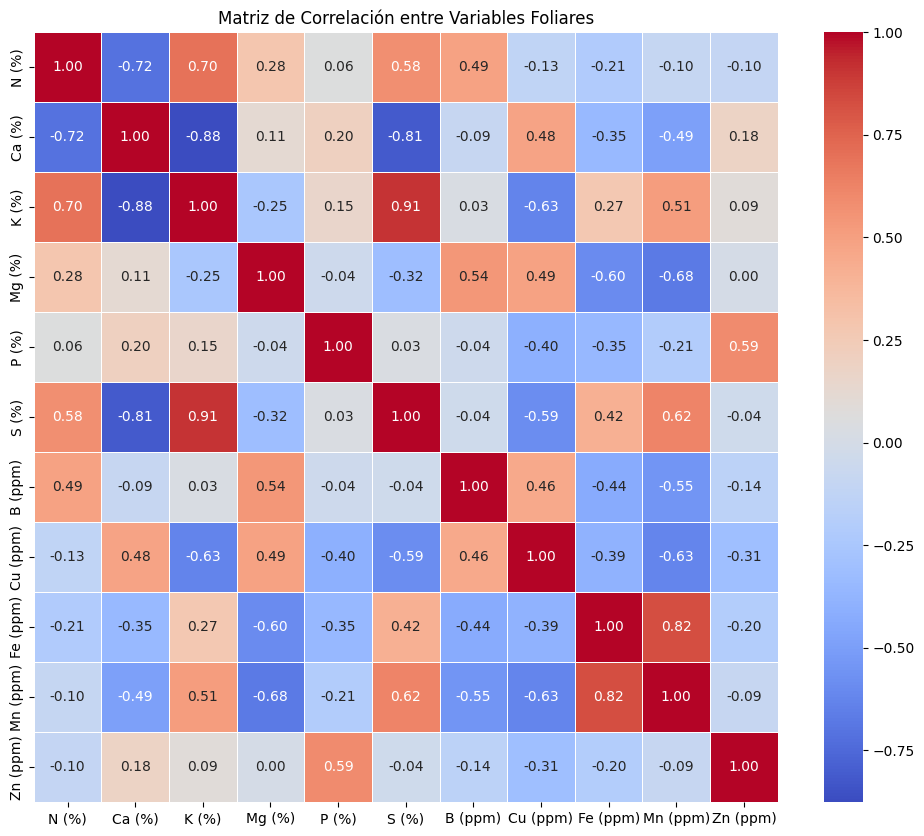

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel
df = pd.read_excel("/home/moranciox/Practica/Excel_practicas/Resultados_Foliar_v2.xlsx")

# Seleccionar las variables de interés para el análisis de correlación
variables_foliares = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Crear un subconjunto del DataFrame solo con las variables foliares
df_foliar = df[variables_foliares]

# Calcular la matriz de correlación
correlation_matrix = df_foliar.corr()

# Visualizar la matriz de correlación utilizando un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación entre Variables Foliares')
plt.show()


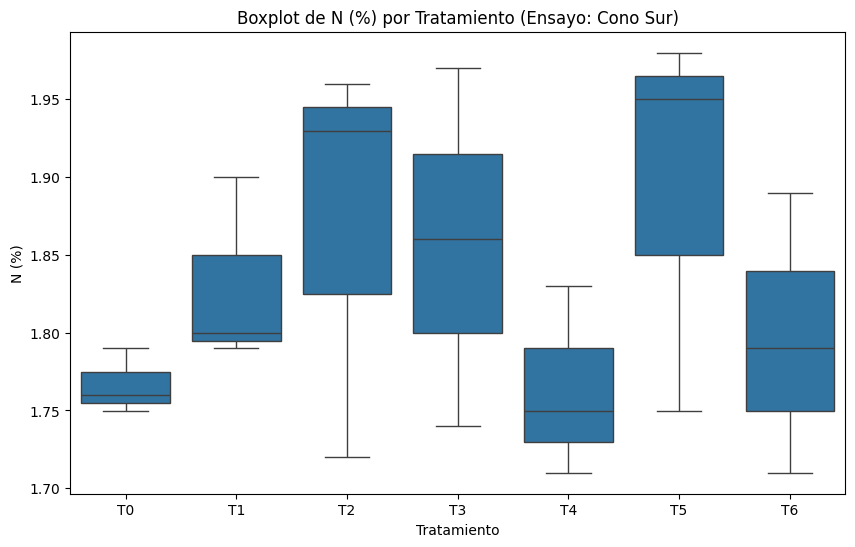

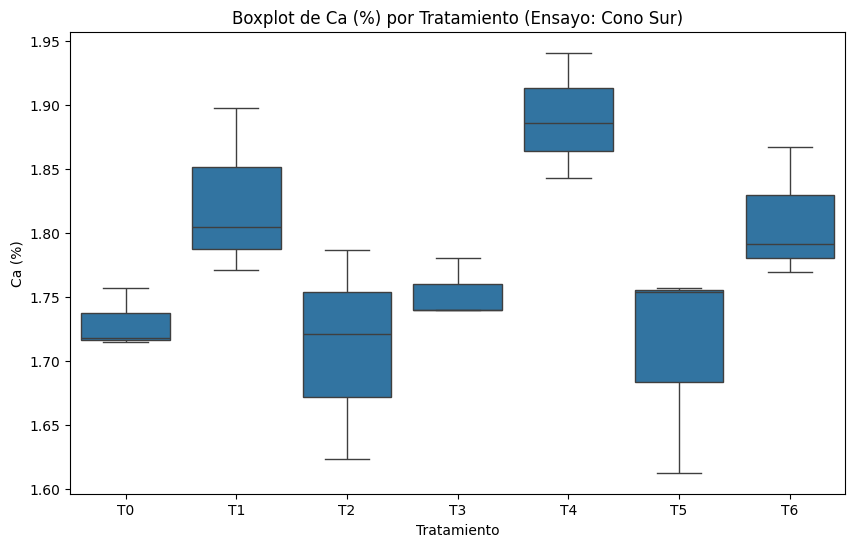

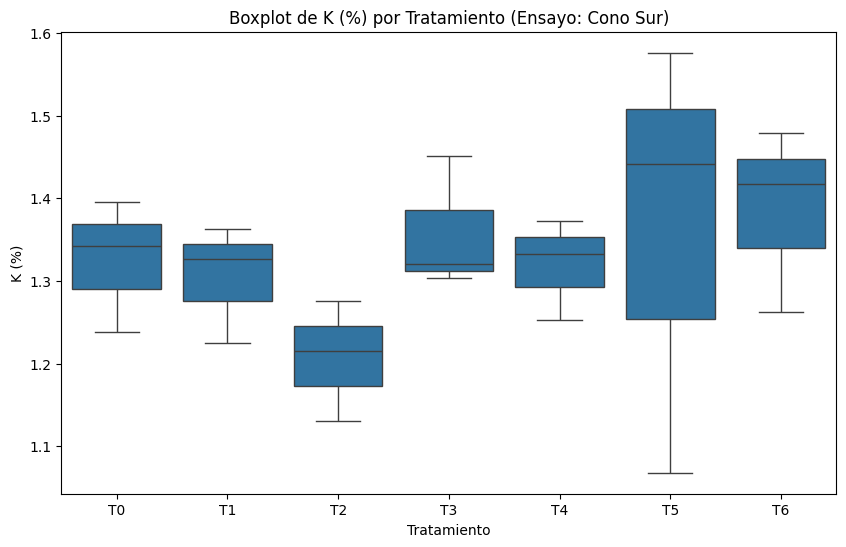

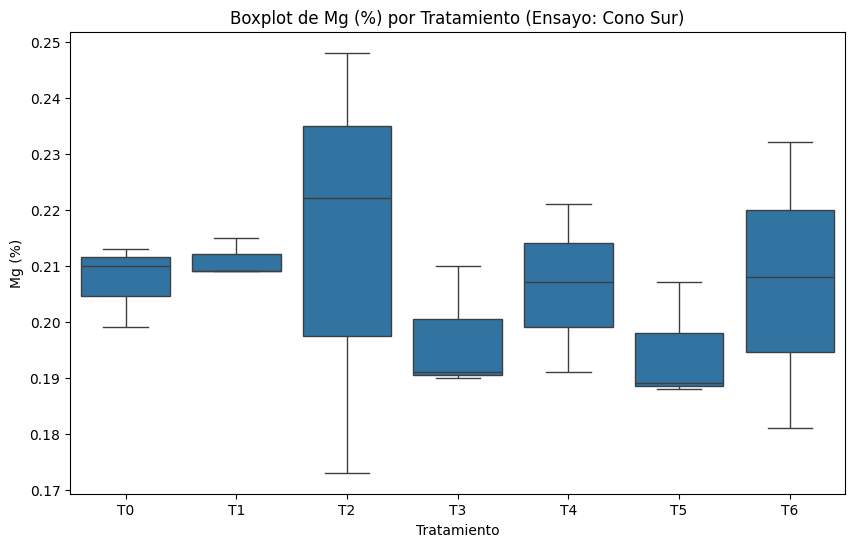

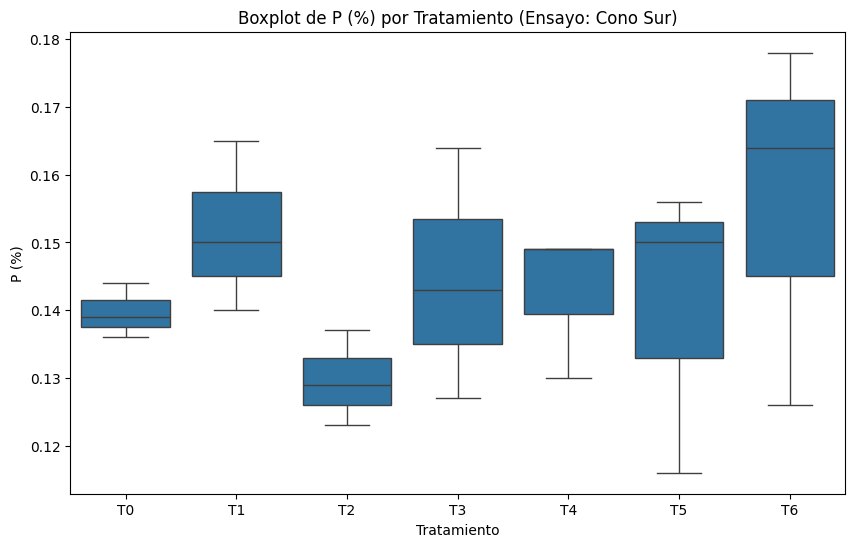

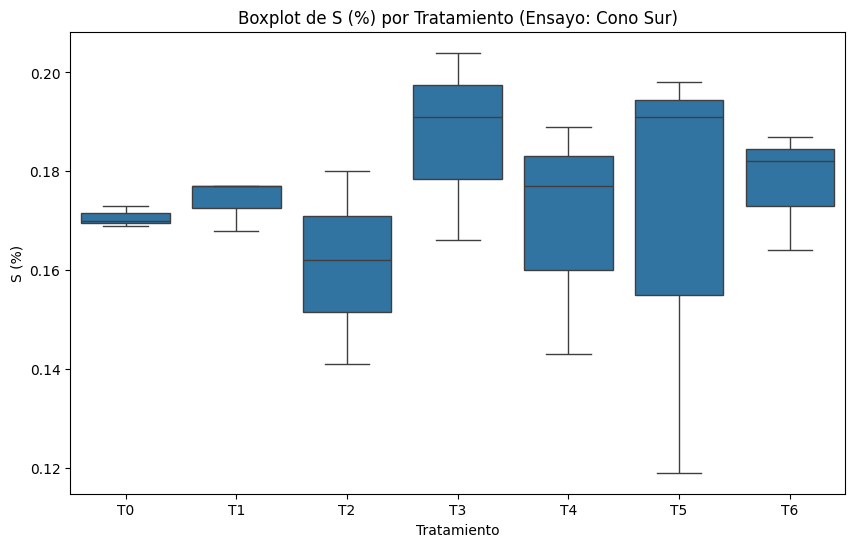

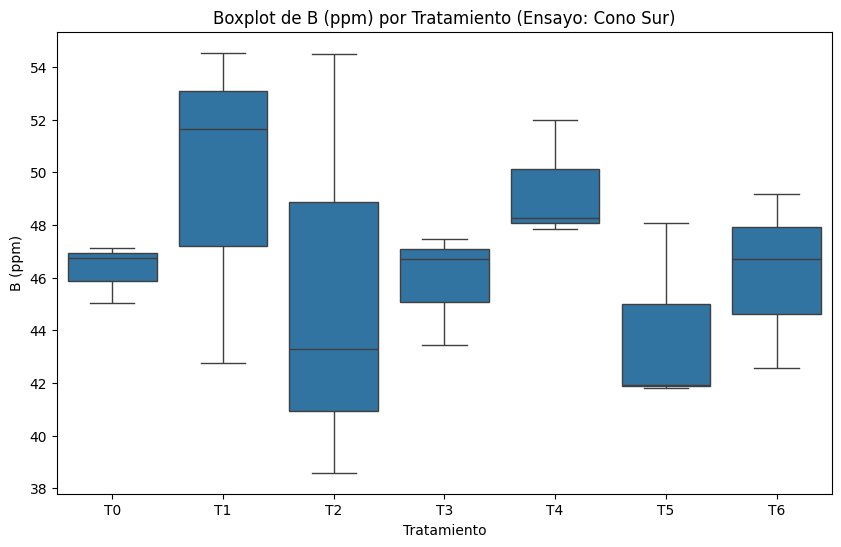

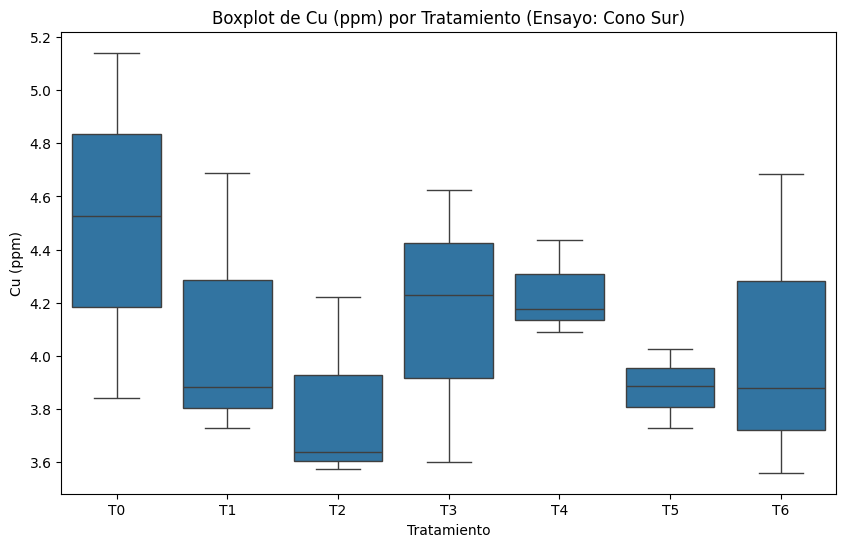

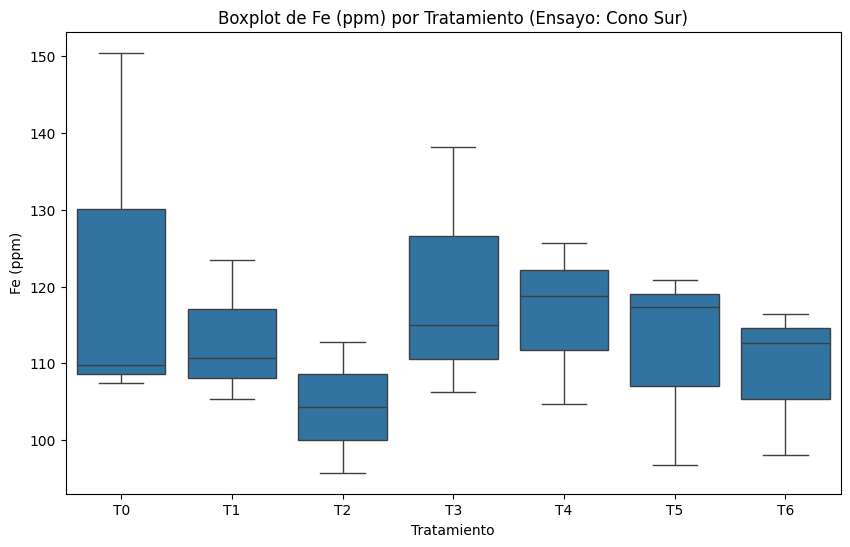

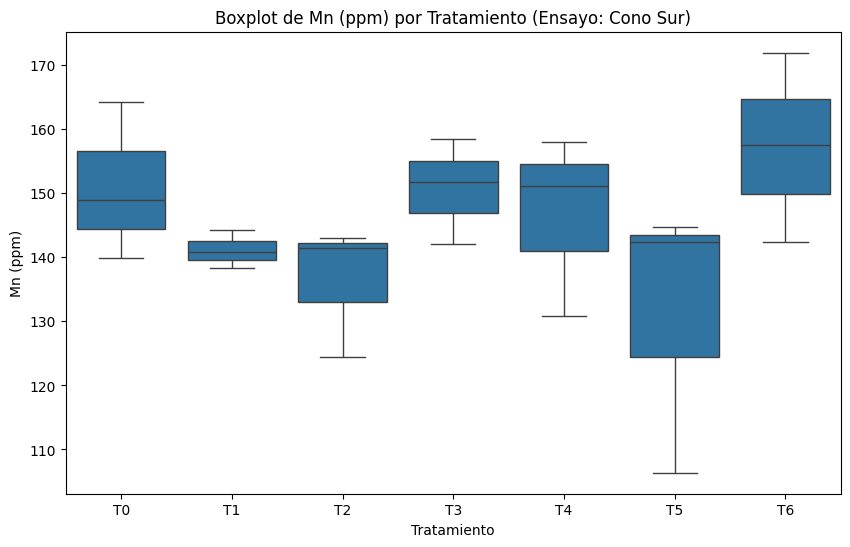

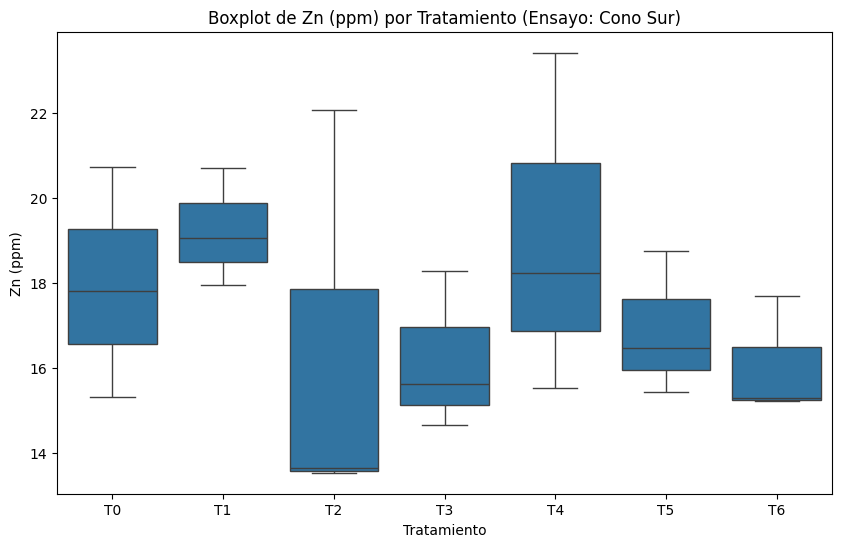

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el DataFrame desde el archivo Excel
df = pd.read_excel("/home/moranciox/Practica/Excel_practicas/Resultados_Foliar_v2.xlsx")

# Filtrar por el ensayo 'Cono Sur'
df_cono_sur = df[df['Ensayo'] == 'Cono Sur']

# Seleccionar las variables de interés para el análisis
variables_foliares = ['N (%)', 'Ca (%)', 'K (%)', 'Mg (%)', 'P (%)', 'S (%)', 'B (ppm)', 'Cu (ppm)', 'Fe (ppm)', 'Mn (ppm)', 'Zn (ppm)']

# Crear boxplots para cada variable foliar separando por tratamiento
for variable in variables_foliares:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Tratamiento', y=variable, data=df_cono_sur)
    plt.title(f'Boxplot de {variable} por Tratamiento (Ensayo: Cono Sur)')
    plt.show()



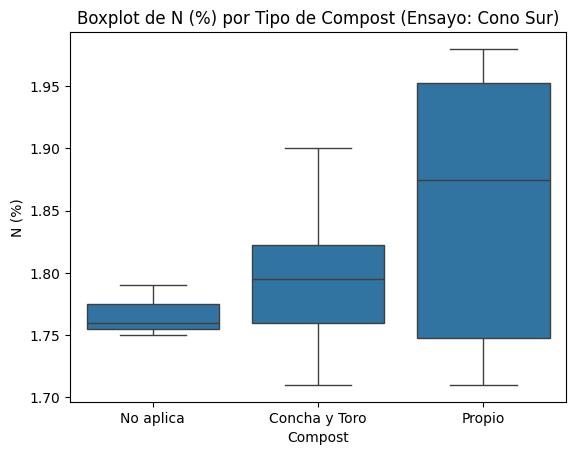

In [15]:
sns.boxplot(x='Compost', y='N (%)', data=df_cono_sur)
plt.title('Boxplot de N (%) por Tipo de Compost (Ensayo: Cono Sur)')
plt.show()


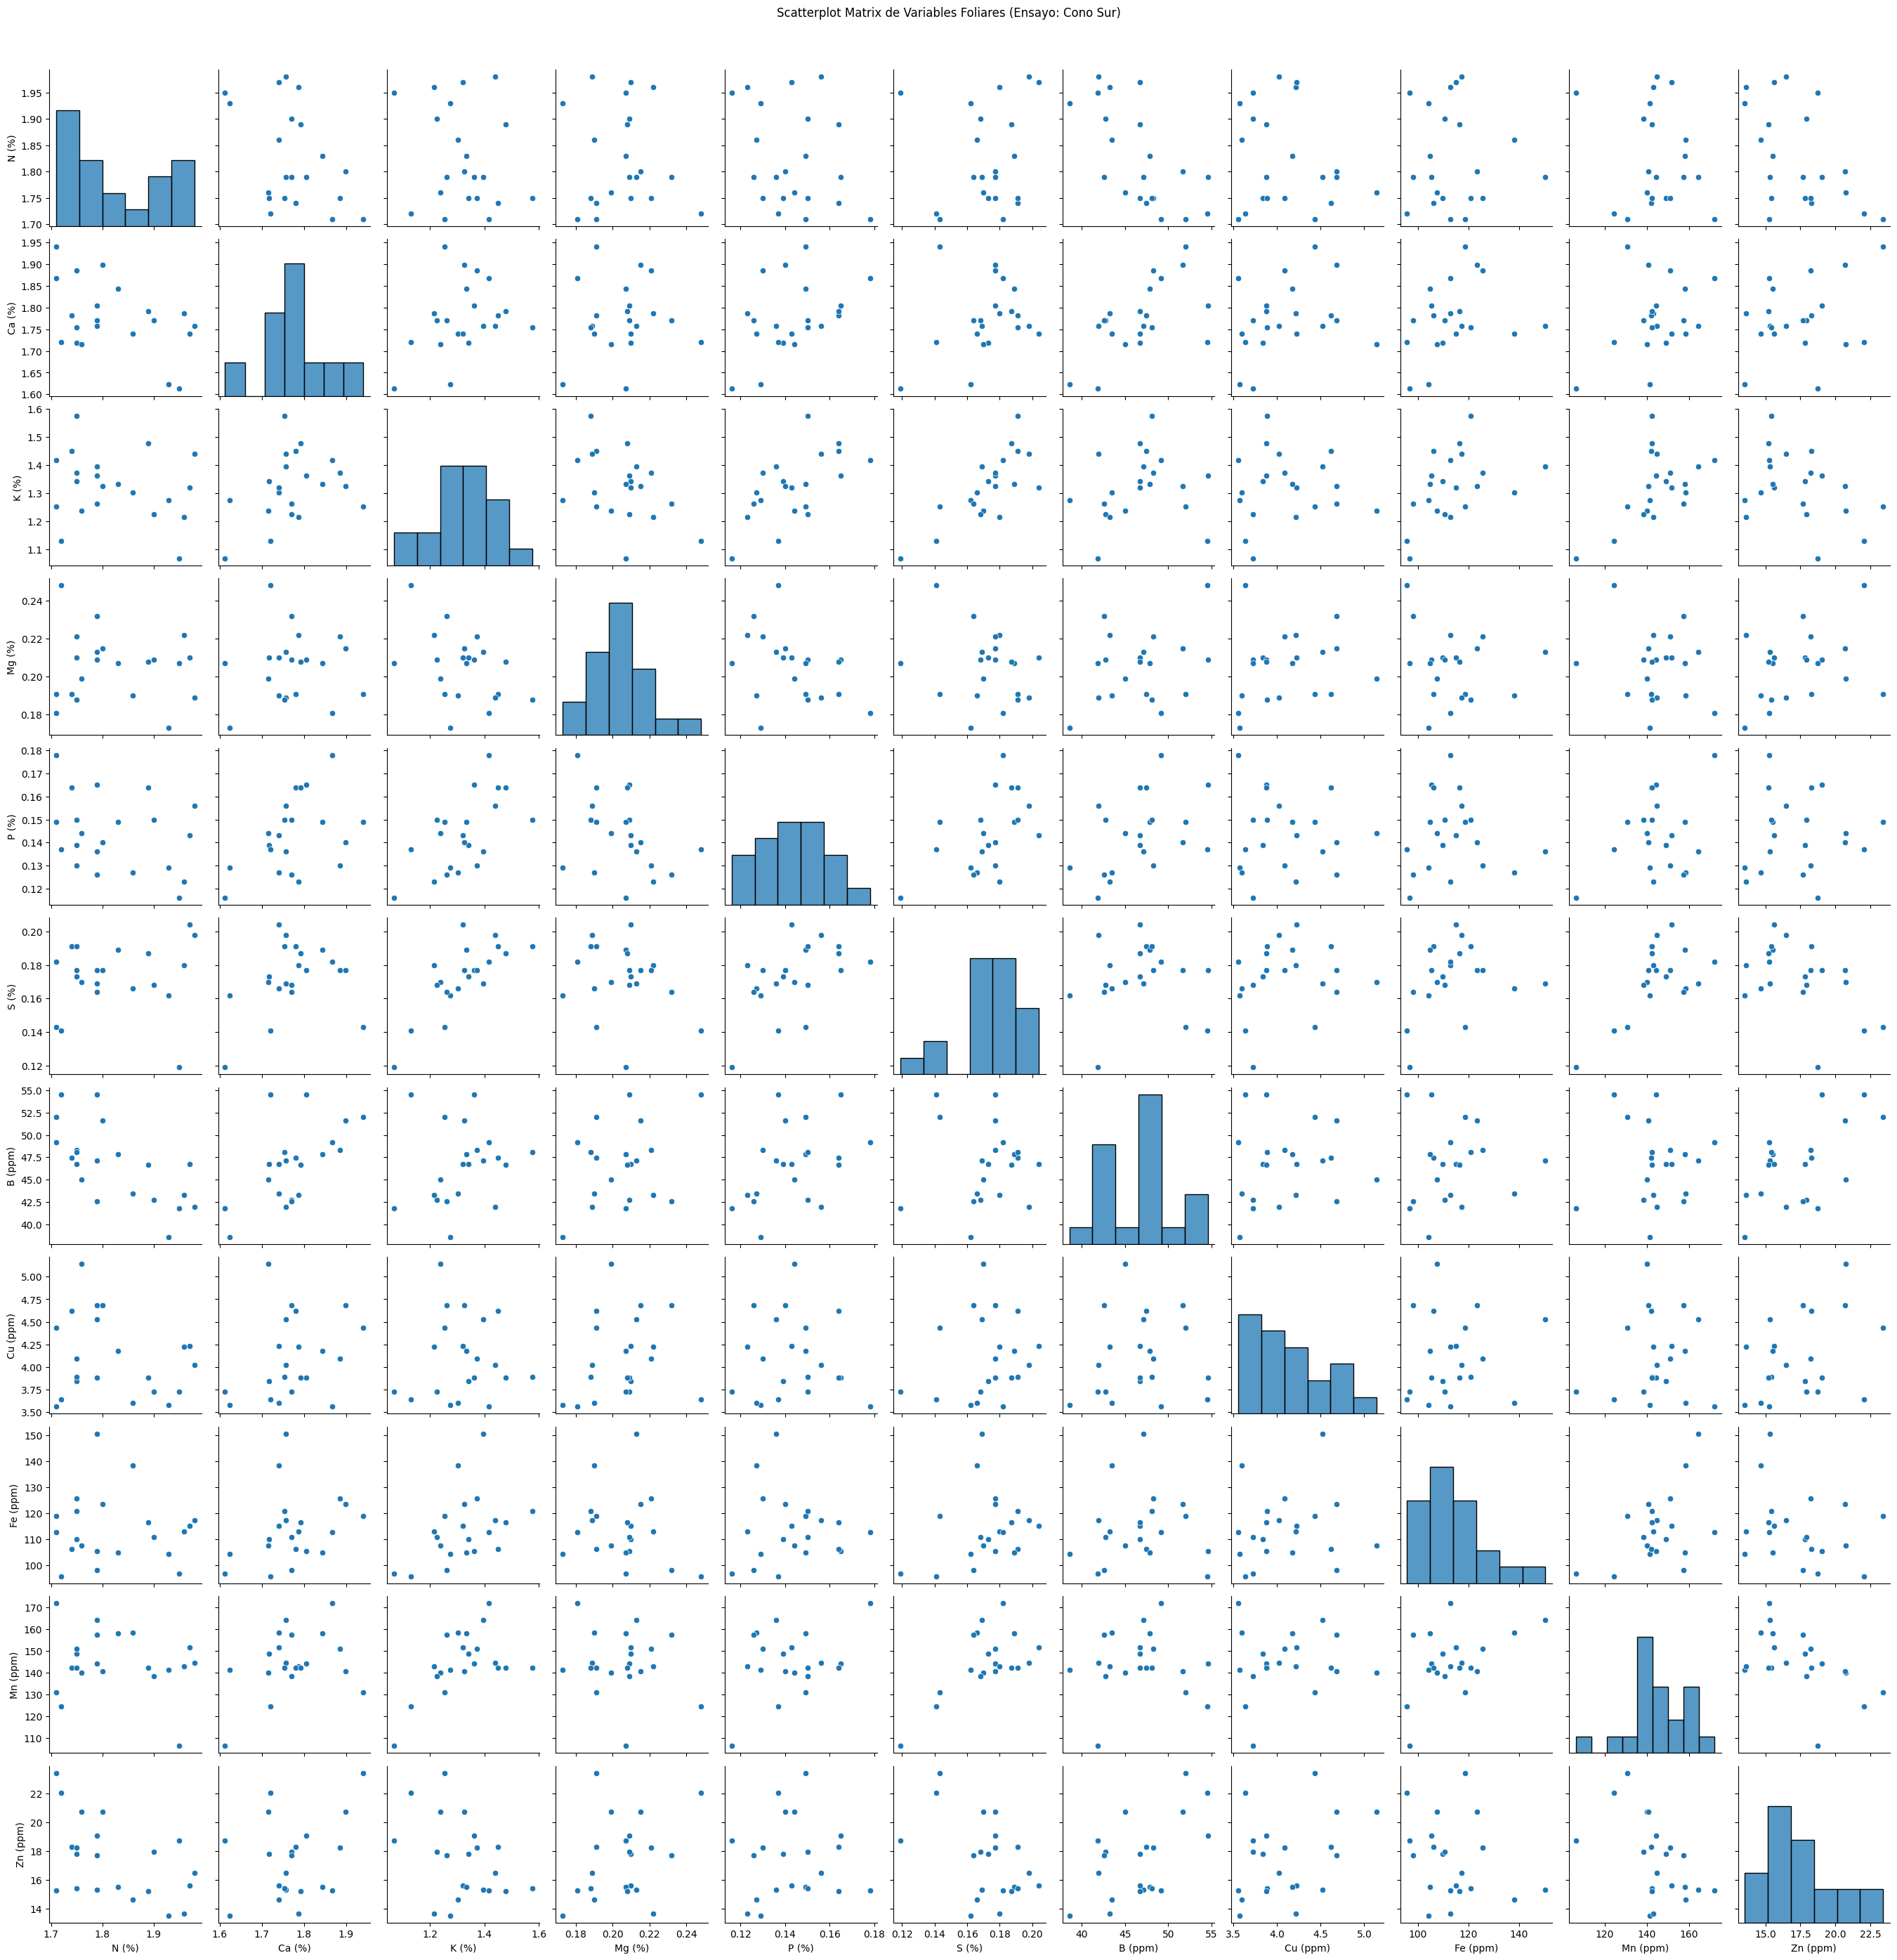

In [16]:
sns.pairplot(df_cono_sur[variables_foliares])
plt.suptitle('Scatterplot Matrix de Variables Foliares (Ensayo: Cono Sur)', y=1.02)
plt.show()


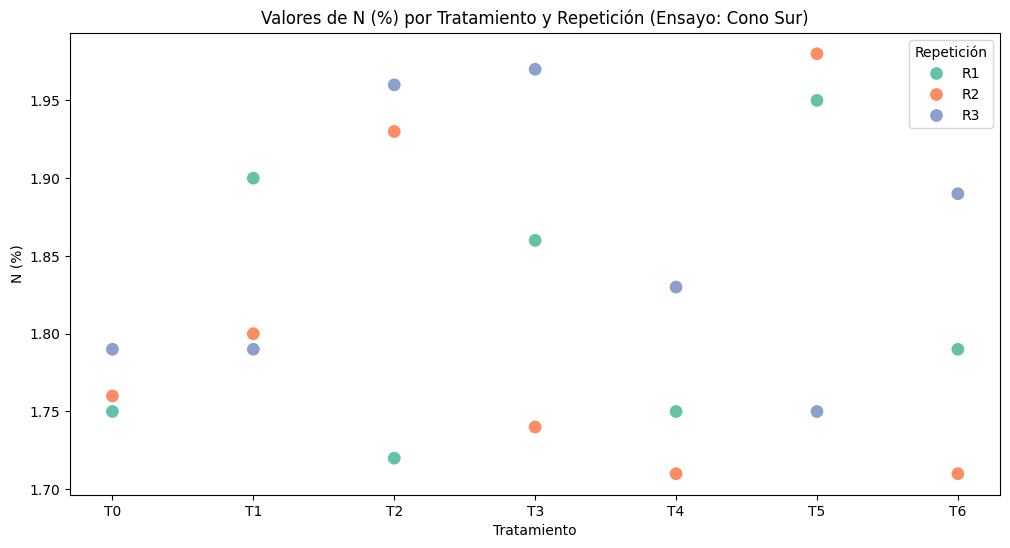

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crea un gráfico de dispersión con puntos coloreados
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Tratamiento', y='N (%)', hue='Repetición', data=df_cono_sur, palette='Set2', s=100)
plt.title('Valores de N (%) por Tratamiento y Repetición (Ensayo: Cono Sur)')
plt.show()





Calculos de Suelo.

,Ensayo,Tratamiento,Repetición,Compost,Aplicación,Concentracion,Variedad,Año de plantación,Tipo,Ingreso,...,CICE,%Sat.Aluminio,Zn mg/Kg,Fe mg/Kg,Cu mg/Kg,Mn mg/Kg,B mg/Kg,Unnamed: 33,Unnamed: 34,Unnamed: 35
0,Cono Sur,T0 Sobrehilera,R1,No aplica,No aplica,No aplica,Cabernet Suavignon,2009,Suelo,2023-07-25,...,NaN,NaN,1.5892,82.994,6.132,4.000,0.849116,NaN,NaN,NaN
1,Cono Sur,T0 Entrehilera,R1,No aplica,No aplica,No aplica,Cabernet Suavignon,2009,Suelo,2023-07-25,...,NaN,NaN,1.5496,98.922,6.704,7.452,0.890121,NaN,NaN,NaN
2,Cono Sur,T0 Sobrehilera,R2,No aplica,No aplica,No aplica,Cabernet Suavignon,2009,Suelo,2023-07-25,...,NaN,NaN,0.7240,73.270,5.790,2.676,0.725874,NaN,NaN,NaN
3,Cono Sur,T0 Entrehilera,R2,No aplica,No aplica,No aplica,Cabernet Suavignon,2009,Suelo,2023-07-25,...,NaN,NaN,0.9742,70.290,5.452,4.416,0.818125,NaN,NaN,NaN
4,Cono Sur,T0 Sobrehilera,R3,No aplica,No aplica,No aplica,Cabernet Suavignon,2009,Suelo,2023-07-25,...,NaN,NaN,0.8404,77.994,6.108,2.744,0.836666,NaN,NaN,NaN


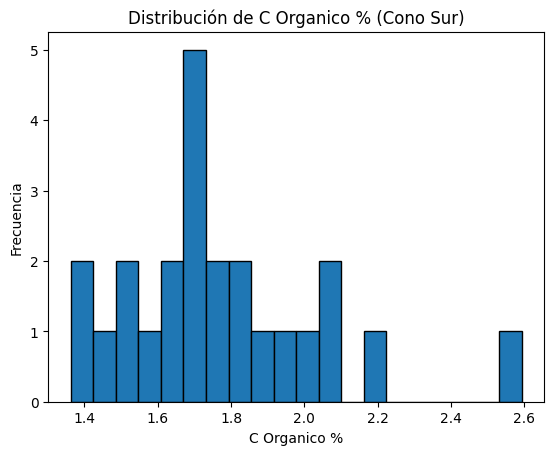

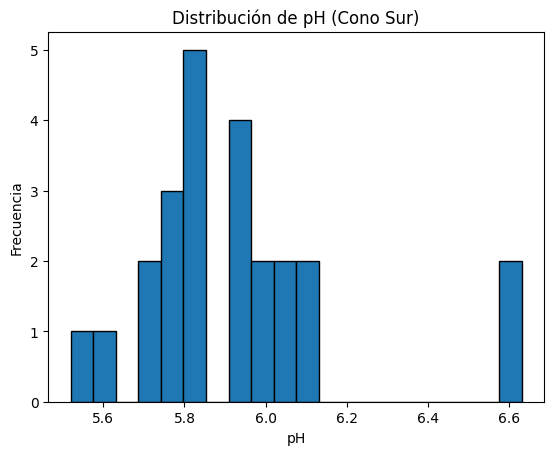

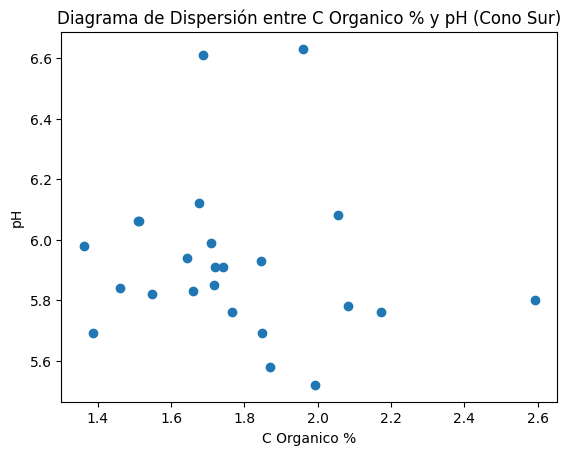

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Ruta y nombre del archivo Excel
archivo_excel = '/home/moranciox/Practica/Excel_practicas/Resultados_Suelo_v2.xlsx'

# Cargar los datos
datos_suelo = pd.read_excel(archivo_excel)

# Filtrar los datos para incluir solo "Cono Sur"
datos_cono_sur = datos_suelo[datos_suelo['Ensayo'] == 'Cono Sur']

# Mostrar las primeras filas del DataFrame filtrado
display(datos_cono_sur.head())

# Realizar análisis exploratorio, por ejemplo, un histograma de C Organico %
plt.hist(datos_cono_sur['C Organico %'], bins=20, edgecolor='black')
plt.title('Distribución de C Organico % (Cono Sur)')
plt.xlabel('C Organico %')
plt.ylabel('Frecuencia')
plt.show()

# Realizar análisis exploratorio, por ejemplo, un histograma de pH
plt.hist(datos_cono_sur['pH'], bins=20, edgecolor='black')
plt.title('Distribución de pH (Cono Sur)')
plt.xlabel('pH')
plt.ylabel('Frecuencia')
plt.show()

# Visualización de Datos - Diagrama de Dispersión entre C Organico % y pH
plt.scatter(datos_cono_sur['C Organico %'], datos_cono_sur['pH'])
plt.title('Diagrama de Dispersión entre C Organico % y pH (Cono Sur)')
plt.xlabel('C Organico %')
plt.ylabel('pH')
plt.show()



In [22]:
import pandas as pd

# Ruta y nombre del archivo Excel
archivo_excel = '/home/moranciox/Practica/Excel_practicas/Resultados_Suelo_v2.xlsx'

# Cargar los datos
datos_suelo = pd.read_excel(archivo_excel)

# Filtrar datos para Cono Sur
datos_cono_sur = datos_suelo[datos_suelo['Ensayo'] == 'Cono Sur']

# Filtrar datos para los tratamientos de interés
tratamientos_interes = ['T0 Sobrehilera', 'T0 Entrehilera', 'T1 Sobrehilera', 'T2 Sobrehilera', 'T3 Sobrehilera', 'T4 Entrehilera', 'T5 Entrehilera', 'T6 Entrehilera']
datos_tratamientos = datos_cono_sur[datos_cono_sur['Tratamiento'].isin(tratamientos_interes)]

# Calcular estadísticas descriptivas para 'C Organico %'
desc_c_organico = datos_tratamientos['C Organico %'].describe()

# Calcular estadísticas descriptivas para 'N Total %'
desc_n_total = datos_tratamientos['N Total %'].describe()

# Calcular estadísticas descriptivas para 'Rel C/N'
desc_rel_cn = datos_tratamientos['Rel C/N'].describe()

# Mostrar resultados
print("Estadísticas descriptivas para C Organico %:")
print(desc_c_organico)

print("\nEstadísticas descriptivas para N Total %:")
print(desc_n_total)

print("\nEstadísticas descriptivas para Relación C/N:")
print(desc_rel_cn)


Estadísticas descriptivas para C Organico %:
count    24.000000
mean      1.771443
std       0.277407
min       1.362377
25%       1.620109
50%       1.718221
75%       1.892192
max       2.592735
Name: C Organico %, dtype: float64

Estadísticas descriptivas para N Total %:
count    24.000000
mean      0.110187
std       0.022900
min       0.073300
25%       0.092575
50%       0.109700
75%       0.126400
max       0.155700
Name: N Total %, dtype: float64

Estadísticas descriptivas para Relación C/N:
count    24.000000
mean     16.484128
std       3.018510
min      12.039208
25%      14.593779
50%      16.451813
75%      18.007525
max      24.967180
Name: Rel C/N, dtype: float64


In [23]:
# Calcular estadísticas descriptivas para 'P mg/Kg'
desc_p = datos_tratamientos['P mg/Kg'].describe()

# Calcular estadísticas descriptivas para 'N (mg/Kg)'
desc_n = datos_tratamientos['N (mg/Kg)'].describe()

# Calcular estadísticas descriptivas para 'pH'
desc_ph = datos_tratamientos['pH'].describe()

# Calcular estadísticas descriptivas para 'K disp (ppm)'
desc_k_disp = datos_tratamientos['K disp (ppm)'].describe()

# Calcular estadísticas descriptivas para 'M.O %'
desc_mo = datos_tratamientos['M.O %'].describe()

# Mostrar resultados
print("Estadísticas descriptivas para P mg/Kg:")
print(desc_p)

print("\nEstadísticas descriptivas para N (mg/Kg):")
print(desc_n)

print("\nEstadísticas descriptivas para pH:")
print(desc_ph)

print("\nEstadísticas descriptivas para K disp (ppm):")
print(desc_k_disp)

print("\nEstadísticas descriptivas para M.O %:")
print(desc_mo)


Estadísticas descriptivas para P mg/Kg:
count    24.000000
mean      9.912259
std       5.581266
min       3.503659
25%       5.442960
50%       8.588010
75%      12.828931
max      23.638157
Name: P mg/Kg, dtype: float64

Estadísticas descriptivas para N (mg/Kg):
count    24.000000
mean      5.355000
std       2.778384
min       3.640000
25%       4.200000
50%       4.760000
75%       5.110000
max      17.360000
Name: N (mg/Kg), dtype: float64

Estadísticas descriptivas para pH:
count    24.000000
mean      5.922500
std       0.262931
min       5.520000
25%       5.775000
50%       5.880000
75%       6.007500
max       6.630000
Name: pH, dtype: float64

Estadísticas descriptivas para K disp (ppm):
count     24.000000
mean     286.763333
std       92.055457
min      168.807000
25%      234.078750
50%      261.932000
75%      319.169500
max      521.392000
Name: K disp (ppm), dtype: float64

Estadísticas descriptivas para M.O %:
count    24.000000
mean      3.053968
std       0.478249
m

In [24]:
import pandas as pd

# Cargar el archivo Excel
archivo_excel = '/home/moranciox/Practica/Excel_practicas/Resultados_Suelo_v2.xlsx'
datos = pd.read_excel(archivo_excel)

# Filtrar solo los datos de "Cono Sur"
datos_cono_sur = datos[datos['Ensayo'] == 'Cono Sur']

# Seleccionar las columnas de interés
columnas_interes = ["Ca cmol(+)kg", "Mg cmol(+)kg", "K cmol(+)kg", "Na cmol(+)kg"]

# Mostrar estadísticas descriptivas
descripcion_datos = datos_cono_sur[columnas_interes].describe()
print(descripcion_datos)


       Ca cmol(+)kg  Mg cmol(+)kg  K cmol(+)kg  Na cmol(+)kg
count     24.000000     24.000000    24.000000     24.000000
mean       7.672383      1.711430     0.733410      0.086857
std        0.475700      0.188958     0.235436      0.030016
min        6.888812      1.336964     0.431731      0.041222
25%        7.457425      1.549492     0.598667      0.066861
50%        7.552809      1.679120     0.669903      0.081572
75%        7.740721      1.860115     0.816290      0.100890
max        9.211517      2.025989     1.333483      0.154022
